In [1]:
# Importing necessary lebraries
import numpy as np
import pandas as pd
import os
import sys
import logging

import matplotlib.pyplot as plt

In [2]:
sys.path.append(os.path.join(os.path.abspath('..')))
# Import modules
from src import data_loading as dl

In [3]:
sys.path.append(os.path.abspath("../"))

# Now import your scripts
from scripts.eda import check_missing_values, check_duplicates, check_outliers,check_stationarity, save_cleaned_data

from scripts.visualizer import plot_historical_prices,plot_rolling_statistics,plot_price_trend_over_years,plot_with_events,plot_time_series_decomposition
from scripts.analyzer import analyze_events

#from scripts.logger import logger 

In [4]:
logger = logging.getLogger('EDA Logger')
logger.setLevel(logging.DEBUG)

In [5]:
# load the data
data = dl.load_data("BrentOilPrices.csv")
print("head of the BrentOilPrices ")
data.head()

head of the BrentOilPrices 


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [6]:
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index("Date")





C:\Users\HP\AppData\Local\Temp\ipykernel_11616\620957423.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"] = pd.to_datetime(data["Date"])


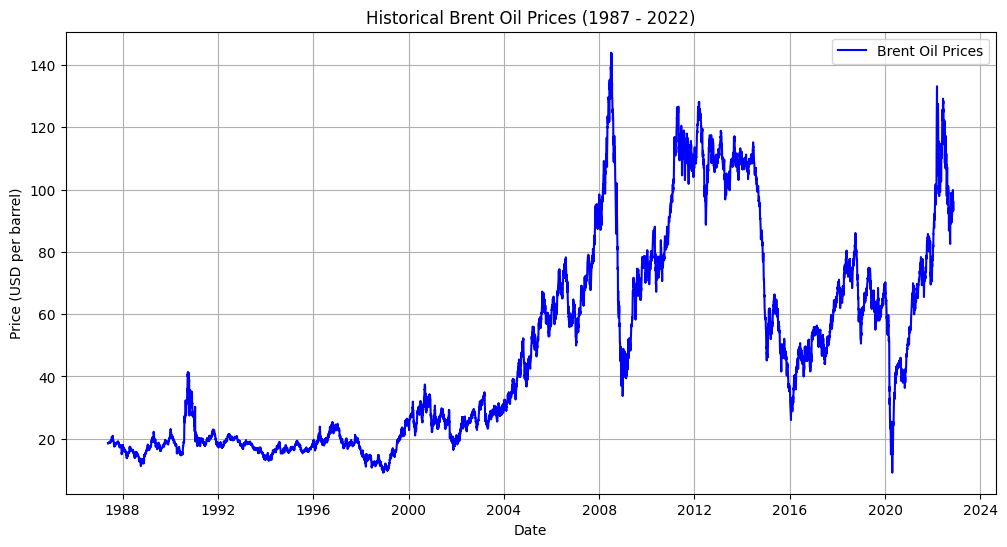

In [7]:
# Plot historical prices
plot_historical_prices(data)

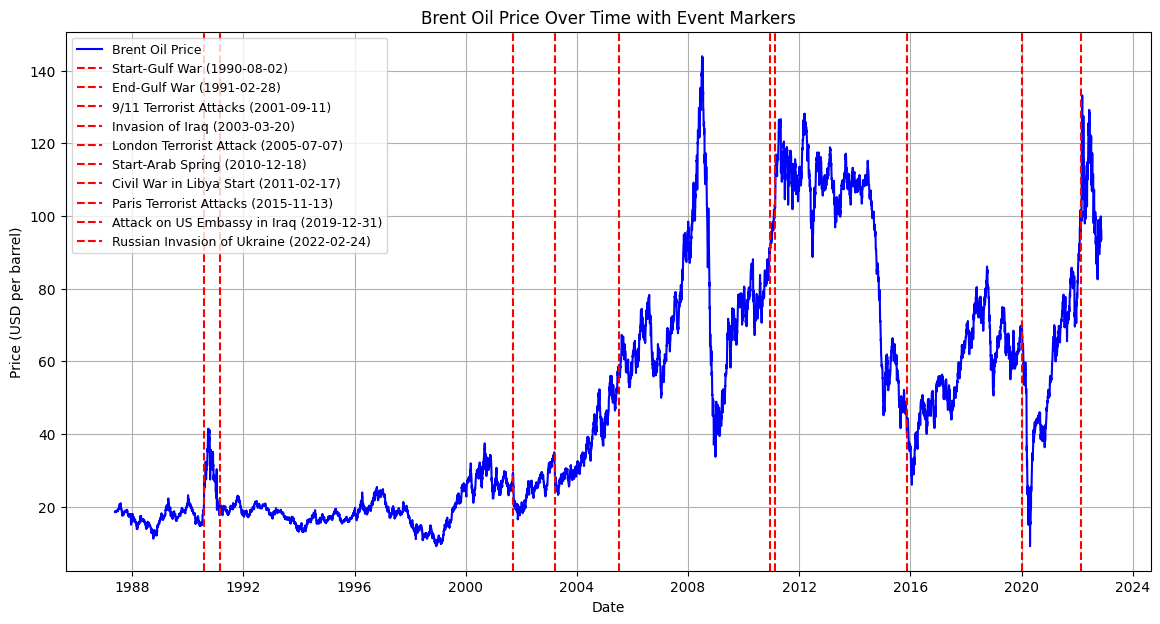

In [8]:

plot_with_events(data)


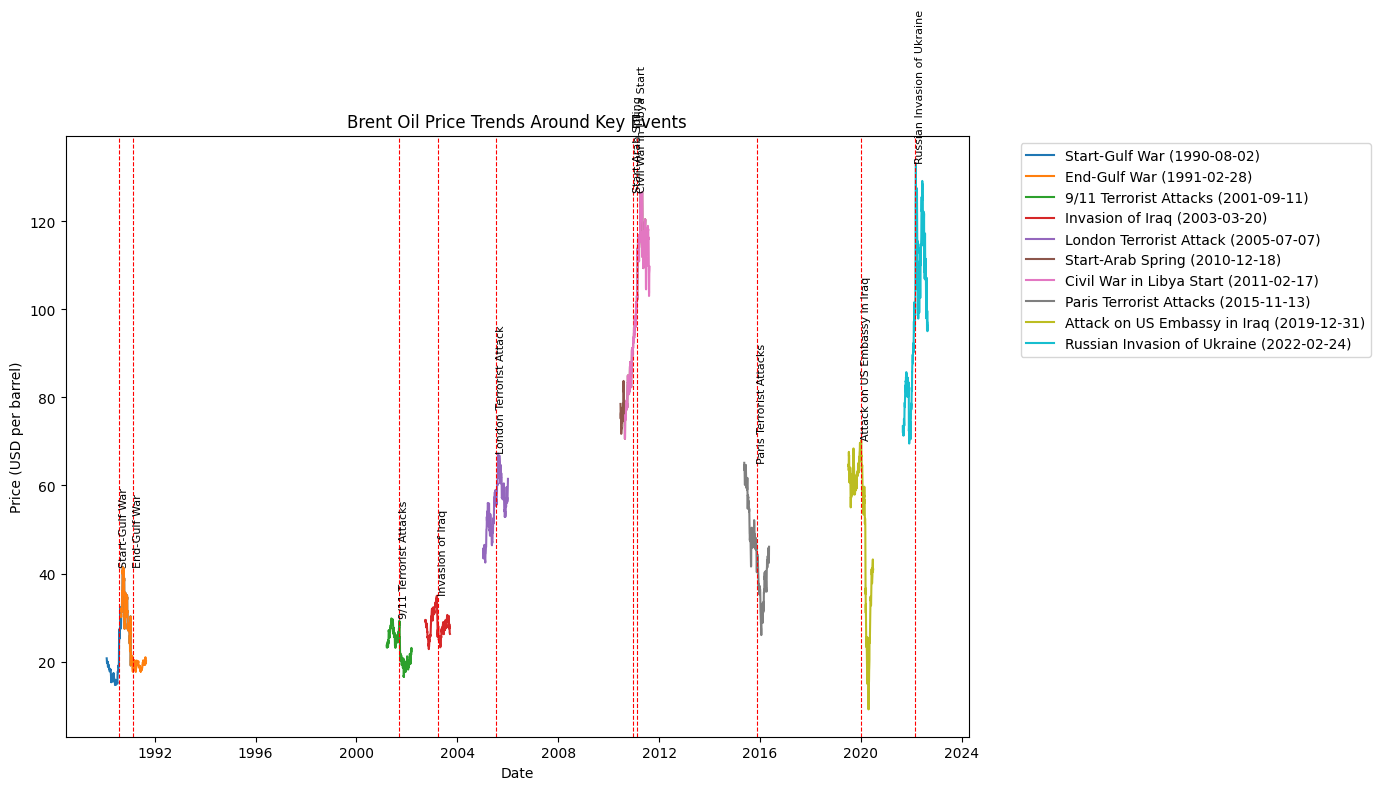

c:\Users\HP\Documents\Dagii\week 10\brent-price-change-analysis\scripts\analyzer.py:163: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
c:\Users\HP\Documents\Dagii\week 10\brent-price-change-analysis\scripts\analyzer.py:172: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


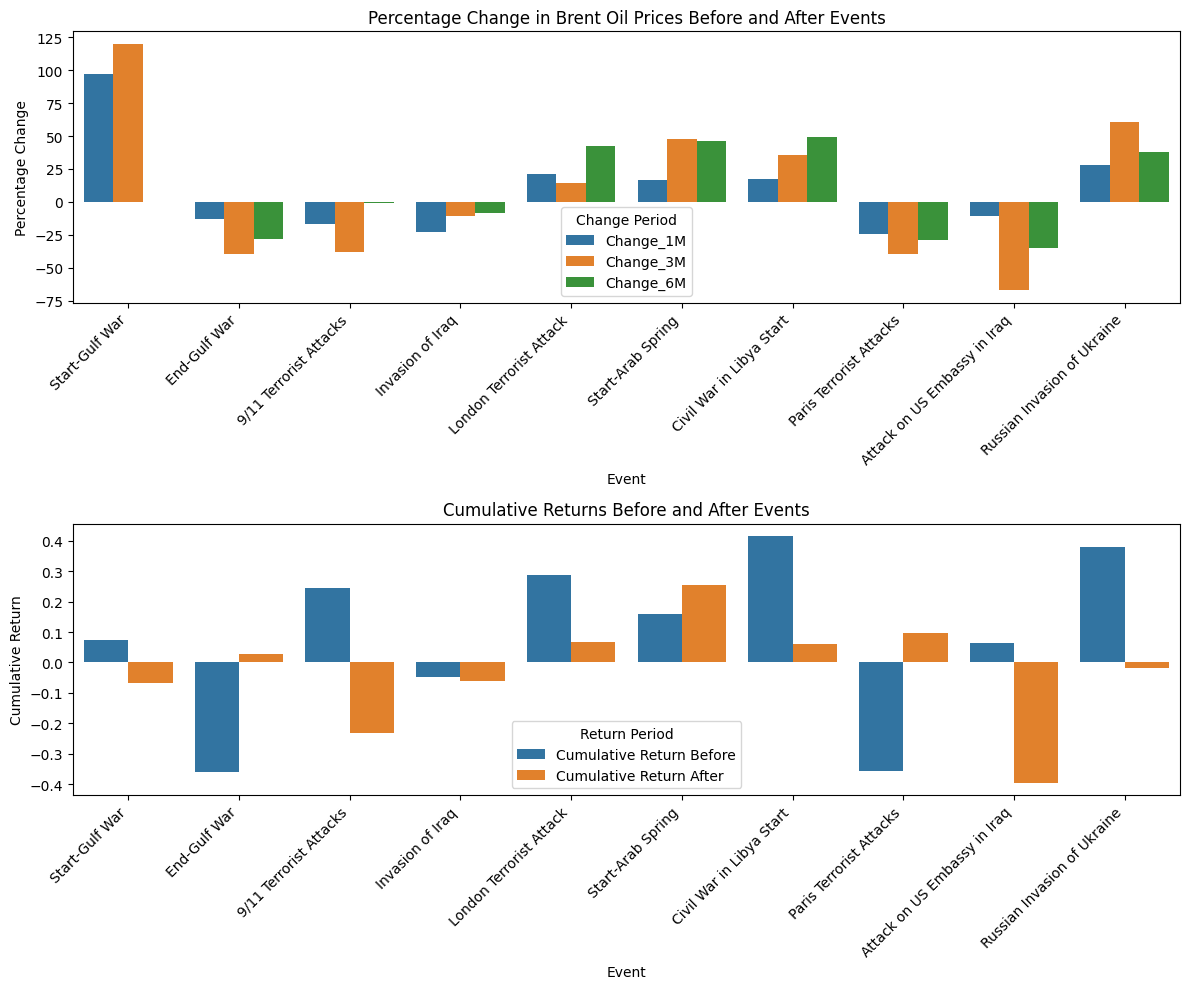


T-Test Results:
                              t-statistic       p-value
Start-Gulf War                 -27.384784  2.357071e-77
End-Gulf War                    17.150966  3.223485e-44
9/11 Terrorist Attacks          22.481413  3.700638e-62
Invasion of Iraq                 5.687661  3.546628e-08
London Terrorist Attack        -18.089887  1.663445e-47
Start-Arab Spring              -28.609274  2.278199e-80
Civil War in Libya Start       -31.381649  5.567102e-88
Paris Terrorist Attacks         20.413657  2.990119e-55
Attack on US Embassy in Iraq    14.444063  7.323658e-35
Russian Invasion of Ukraine    -27.835689  2.075132e-78


In [9]:
# Call the function
analyze_events(data)